In [59]:
direct = open("direct_map.csv","r").readlines()
inverse = open("inverse_map.csv", "r").readlines()

In [60]:
direct_s = [x.split(',') for x in direct]
inverse_s = [x.split(',') for x in inverse]

In [16]:
def fix(s):
    s[0] = int(s[0],2)
    s[1] = int(s[1])
    s[2] = int(s[2])
    return s

In [61]:
direct_s = [fix(x) for x in direct_s]
inverse_s = [fix(x) for x in inverse_s]

In [62]:
direct_s_sorted = sorted(direct_s, key=lambda x:x[0])
inverse_s_sorted = sorted(inverse_s, key=lambda x:x[0])

In [63]:
i = 0
j = 0
matches = {}
while i<len(direct_s_sorted) and j < len(inverse_s_sorted):
    if direct_s_sorted[i][0] == inverse_s_sorted[j][0]:
        matches[(direct_s_sorted[i][1], direct_s_sorted[i][2])] = (inverse_s_sorted[j][1], inverse_s_sorted[j][2])
        i = i + 1
    
    elif direct_s_sorted[i][0] < inverse_s_sorted[j][0]:
        i = i + 1
    
    else:
        while inverse_s_sorted[j][0] < direct_s_sorted[i][0] and j < len(inverse_s_sorted):
            j = j + 1
            
# print matches

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
print len(matches)

16031


In [65]:
X = []
Y = []
Z = []
distortion_map = open("distortion.txt", "w")
#NOTE: 4.5, 6 or 2.25, 3; harcoded, always verify
for k in matches:
    #if k[1]<500 and k[1] > 200:
    distortion_map.write(str(k[0])+" "+str(k[1]))
    distortion_map.write(" ")
    distortion_map.write(str(int(matches[k][0]/2.25))+ " " + str(int(matches[k][1]/3.)))
    distortion_map.write("\n")
    
    X.append(k[0])
    Y.append(k[1])
    _s = matches[k][0]/2.25
    _t = matches[k][1]/3.
    d = np.sqrt((k[0]-_s)**2 + (k[1]-_t)**2)
    Z.append(d)
    
distortion_map.close()

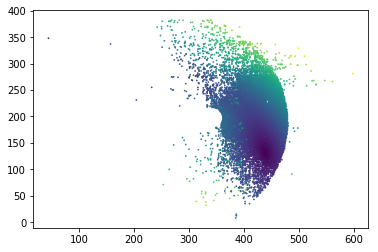

In [50]:
plt.scatter(Y,X,0.5,Z)

In [38]:
import cv2

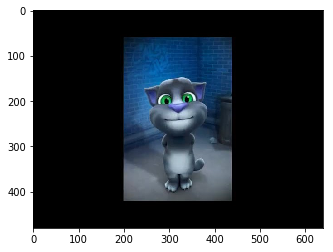

In [39]:
#im = cv2.imread("../structured_calib/image_14.BMP")
im = cv2.imread("tom.jpg")
plt.imshow(im)

In [66]:
dist_im = np.zeros(im.shape, np.float32)
distortions = open("distortion.txt","r").readlines()
for disto in distortions:
    distortion = disto.split(' ')
    s = int(distortion[0])
    t = int(distortion[1])
    u = int(distortion[2])
    v = int(distortion[3])
    dist_im[s,t] = [u/(float(im.shape[0])),v/(float(im.shape[1])),0]

dist_im_blur = cv2.medianBlur(dist_im, 5)

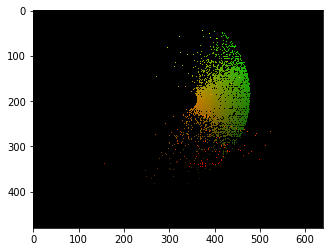

In [69]:
plt.imshow(dist_im)

In [107]:
plt.imsave('uvplot_blur.png',dist_im_blur)

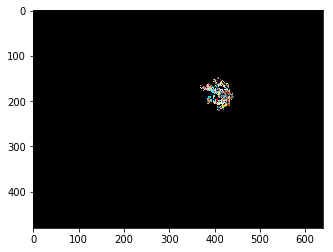

In [58]:
im = cv2.imread("test.png")

im2 = np.zeros(im.shape, np.float32)

#im2 = im.copy()
distortions = open("distortion.txt","r").readlines()
for disto in distortions:
    distortion = disto.split(' ')
    s = int(distortion[0])
    t = int(distortion[1])
    u = int(distortion[2])
    v = int(distortion[3])
    im2[s,t] = im[int(dist_im_blur[s,t][0]*im.shape[0]), int(dist_im_blur[s,t][1]*im.shape[1])]
    #im2[s,t] = im[u,v]
    
#for i in range(im2.shape[0]):
#    for j in range(im2.shape[1]):
#        if np.sum(im2[i,j])==0:
#            count = 0
#            if i >= 1:
#                im2[i,j] = im2[i,j] + im2[i-1,j]
#                count = count+1
#            if i<im2.shape[0]-1:
#                im2[i,j] = im2[i,j] + im2[i+1,j]
#                count = count+1
#            if j >= 1:
#                im2[i,j] = im2[i,j] + im2[i,j-1]
#                count = count+1
#            if j<im2.shape[1]-1:
#                im2[i,j] = im2[i,j] + im2[i,j+1]
#                count = count+1
#            im2[i,j] = im2[i,j]/float(count)
    

cv2.imwrite('final.png', im2)
plt.imshow(im2)

In [123]:
im3 = cv2.medianBlur(im2, 3)

In [124]:
cv2.imwrite('final_blur.png', im3)

True